In [1]:
library(mgcv)#linear regression
library(psych)
library(ggplot2)
library(corrplot)# correlation plot
library(RColorBrewer) # color
library(WVPlots)
library(reshape2)
library(MASS)
library(glmnet)# Lasso, ridge regression
library(dplyr) # %>%
library(data.table) #fread
library(ggpubr) # Combine different plots
library(ridge) # ridge regression
library(pheatmap) # Heat map
library(yardstick)
library(MLmetrics)
library(caret)
library(randomForest) # regression tree
library(mgcv) # GAM

Loading required package: nlme

This is mgcv 1.8-31. For overview type 'help("mgcv-package")'.

Warning message:
"package 'psych' was built under R version 3.6.3"
Warning message:
"package 'ggplot2' was built under R version 3.6.3"

Attaching package: 'ggplot2'


The following objects are masked from 'package:psych':

    %+%, alpha


Warning message:
"package 'corrplot' was built under R version 3.6.3"
corrplot 0.84 loaded

Warning message:
"package 'WVPlots' was built under R version 3.6.3"
Loading required package: wrapr

Warning message:
"package 'wrapr' was built under R version 3.6.3"

Attaching package: 'wrapr'


The following object is masked from 'package:mgcv':

    %.%


Warning message:
"package 'reshape2' was built under R version 3.6.3"
Warning message:
"package 'MASS' was built under R version 3.6.3"
Warning message:
"package 'glmnet' was built under R version 3.6.3"
Loading required package: Matrix


Attaching package: 'Matrix'


The following objects are masked from 'p

In [73]:
library(lubridate)


Attaching package: 'lubridate'


The following objects are masked from 'package:data.table':

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following object is masked from 'package:base':

    date




# input aggregration data

In [22]:
YEARLIST =c("19","20")
MONTHLIST = c("01", "02", "03", "04", "05", "06", "07", "08", "09", "10","11","12")
COMPUTATION_FILEPATH = "F:/data/tidy/trajectory-aggregation/"
# Data input
aggregation_data_input = function(YEARLIST,MONTHLIST){
    df = data.table()
    for (y in YEARLIST) {
         for (m in MONTHLIST) {
             assign("d",fread(paste0(COMPUTATION_FILEPATH, paste(paste("trajectory", "aggregation" , y , m , sep = "-", collapse = ""), ".csv", sep=""))))
             df = rbind(df,d)
             }
        }
    return(df)
}
agg_data = aggregation_data_input(YEARLIST,MONTHLIST)

In [18]:
agg_data = process(agg_data)

In [23]:
colnames(agg_data)[6] = "red"
colnames(agg_data)[7] = "blue"
colnames(agg_data)[8] = "orange"
colnames(agg_data)[9] = "green"

In [36]:
png("../../figures/S4A1-ridership.png",height= 2000,width=6000,res=360)
 ggplot(agg_data, aes(x = speed_bin_4_accel_bin_1_time_hr, y = ridership))  +
  geom_point(size = 2, alpha = 0.2, color = "darkred") + 
  labs(x = "S4A1 (hours)", y = "Ridership")+
  theme(
      title= element_text(size = 40),
      axis.title.x = element_text(size = 30),
      axis.title.y = element_text(size = 30),
      axis.text.x = element_text(size = 25),
      axis.text.y = element_text(size = 25))
dev.off()

png 
  2

In [25]:
# png("../../figures/S6A5-orange.png",height= 2000,width=6000,res=360)
p1 = ggplot(agg_data, aes(x = speed_bin_6_accel_bin_5_time_hr, y = orange))  +
  geom_point(size = 2, alpha = 0.2, color = "darkred") + 
  labs(x = "S6A5 (hours)", y = "Orange")+
  theme(
      title= element_text(size = 40),
      axis.title.x = element_text(size = 30),
      axis.title.y = element_text(size = 30),
      axis.text.x = element_text(size = 25),
      axis.text.y = element_text(size = 25))
p2 = ggplot(agg_data, aes(x = speed_bin_6_accel_bin_5_time_hr, y = blue))  +
  geom_point(size = 2, alpha = 0.2, color = "darkred") + 
  labs(x = "S6A5 (hours)", y = "Blue")+
  theme(
      title= element_text(size = 40),
      axis.title.x = element_text(size = 30),
      axis.title.y = element_text(size = 30),
      axis.text.x = element_text(size = 25),
      axis.text.y = element_text(size = 25))
p3 = ggplot(agg_data, aes(x = speed_bin_6_accel_bin_5_time_hr, y = green))  +
  geom_point(size = 2, alpha = 0.2, color = "darkred") + 
  labs(x = "S6A5 (hours)", y = "Green")+
  theme(
      title= element_text(size = 40),
      axis.title.x = element_text(size = 30),
      axis.title.y = element_text(size = 30),
      axis.text.x = element_text(size = 25),
      axis.text.y = element_text(size = 25))
p4 = ggplot(agg_data, aes(x = speed_bin_6_accel_bin_5_time_hr, y = red))  +
  geom_point(size = 2, alpha = 0.2, color = "darkred") + 
  labs(x = "S6A5 (hours)", y = "Red")+
  theme(
      title= element_text(size = 40),
      axis.title.x = element_text(size = 30),
      axis.title.y = element_text(size = 30),
      axis.text.x = element_text(size = 25),
      axis.text.y = element_text(size = 25))

p = ggarrange(p3 + rremove("xlab"), p1 + rremove("xlab"),p2 + rremove("xlab"), p4 + rremove("xlab"), nrow = 2, 
              ncol = 2)
# dev.off()

Warning message:
"Removed 8 rows containing missing values (geom_point)."
Warning message:
"Removed 1051 rows containing missing values (geom_point)."
Warning message:
"Removed 971 rows containing missing values (geom_point)."
Warning message:
"Removed 1121 rows containing missing values (geom_point)."


In [28]:
p_final = annotate_figure(p, bottom = text_grob("S6A5 (hours)", size = 30))

In [32]:
png("../../figures/S6A5-number of trains.png",height= 5000,width=5000,res=360)
p_final
dev.off()

png 
  2

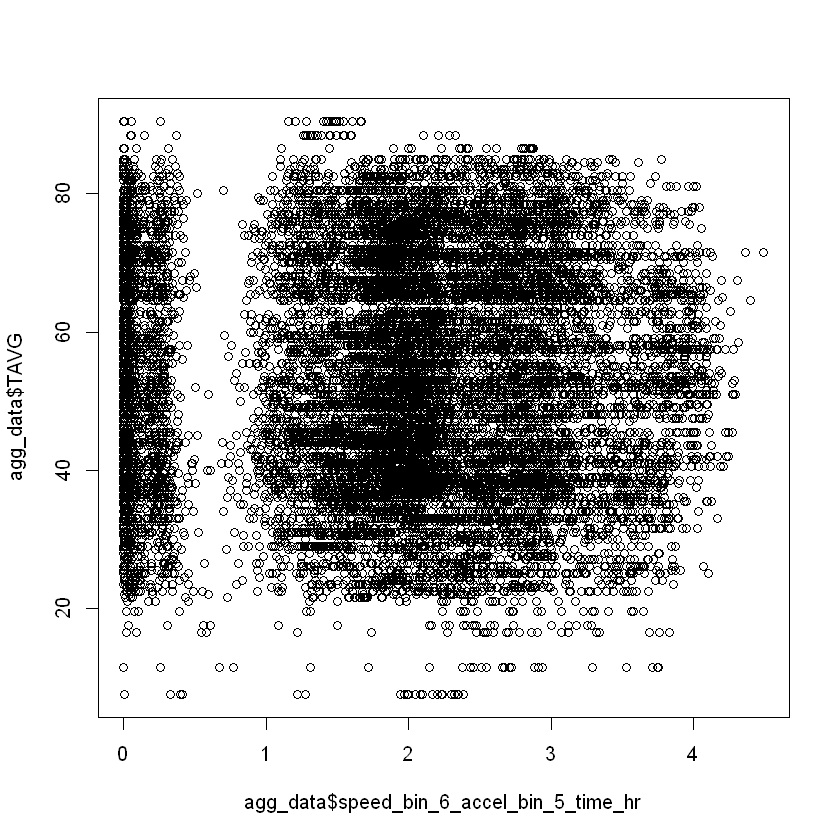

In [9]:
plot(agg_data$speed_bin_6_accel_bin_5_time_hr, agg_data$TAVG)

In [21]:
process = function(df){
    colnames(df)[6] = "red"
    colnames(df)[7] = "blue"
    colnames(df)[8] = "orange"
    colnames(df)[9] = "green"
    df$month_factor = as.factor(df$month)
    df$num_trains = df$red + df$orange + df$blue + df$green
    df$TAVG_squared = I(df$TAVG^2)
}

In [170]:
agg_data_compute = process(agg_data_compute)

In [174]:
agg_mean = agg_data_compute[, lapply(.SD, function(x) list(mean = mean(x))), .SDcols = cols]

ERROR: Error in `[.default`(agg_data_compute, , lapply(.SD, function(x) list(mean = mean(x))), : incorrect number of dimensions


In [ ]:
df_model

In [42]:
mean(agg_data_compute$speed_bin_6_accel_bin_6_time_hr,na.rm =TRUE)

[1] 2.589177

In [34]:
mean(agg_data_compute$speed_bin_6_accel_bin_4_time_hr,na.rm =TRUE)

[1] 0.9511332

In [45]:
agg_data[,mean(TAVG,na.rm =TRUE),by = .(month)]

month,V1
<int>,<dbl>
1,34.22485
2,35.79621
3,40.45344
4,47.66536
5,57.31757
6,68.72911
7,76.98620
8,74.09293
9,66.77282


In [59]:
running_trains_hour = function(df){
    run_trains_nums_melt = melt(df,id.vars = c("year","month","day","hour"), measure.vars = c('1','2','3',"4"))
    run_trains_nums_melt$date = with(run_trains_nums_melt, ISOdatetime(year,month, day, hour, 0, 0))
    run_trains_nums_melt$variable<-factor(run_trains_nums_melt$variable,
                       levels = c('1','2','3',"4"),
                       labels = c("Red","Blue","Orange","Green"))
   # png("../../figures/train_numbers_month_jun_6.png",height=4000,width=7000,res=360)
    p = ggplot(run_trains_nums_melt) + 
    geom_point(aes(x = date, y = value, color = variable), # linetype = weekends), 
              size= 2 , alpha=0.1) +
    labs(#title = "Hourly running train numbers", 
         x = "Hour", y = "Number of trains", color = "Line type") +
    theme_light() +
    theme(title= element_text(size = 30),
          axis.title = element_text(size = 30),
          axis.text.x = element_text(size = 25),
          axis.text.y = element_text(size = 25),
          legend.title = element_text(size = 30),
          legend.text = element_text(size = 25)) +        
    scale_colour_manual(values = c("Red","Blue","darkorange","darkgreen"))
    return(p)
}

In [60]:
png("../../figures/figures for report/train_numbers_month.png",height= 2000,width=6000,res=360)
running_trains_hour(agg_data)
dev.off()

Warning message:
"Removed 3151 rows containing missing values (geom_point)."


png 
  2

In [17]:
d_plot = df [,-(1:5)] 
d_plot_melt = melt(d_plot,"energy_MWh")
# Energy consumption vs variables scattered plot
options(repr.plot.width = 50, repr.plot.height = 50)
png("../../figures/Energy-scattered-19-20.png",height=15000,width=20000,res=360)
ggplot(d_plot_melt ,aes(x = value,y = energy_MWh)) + 
geom_point(colour= "red") + 
facet_wrap(~variable ,ncol = 6 ,scales = "free") +
labs(title = "Energy vs variables ", x = "Variables", y = "Energy consumption(MWh)")+
theme(strip.text = element_text(size = rel(4)),
      title= element_text(size = 60),
      axis.title.x = element_text(size = 50),
      axis.title.y = element_text(size = 50),
      axis.text.x = element_text(size = 30),
      axis.text.y = element_text(size = 30)，
      panel.spacing = unit(2, "lines"))
dev.off()

Warning message in melt.data.table(d_plot, "energy_MWh"):
"'measure.vars' [1, 2, 3, 4, ...] are not all of the same type. By order of hierarchy, the molten data value column will be of type 'double'. All measure variables not of type 'double' will be coerced too. Check DETAILS in ?melt.data.table for more on coercion."
Warning message:
"Removed 3154 rows containing missing values (geom_point)."


png 
  2

# Correlation matrix

In [149]:
correlation_plot = function(df){
    #remove date and hour variables
    d_plot = df [,-(1:5)] 
    d_plot_melt = melt(d_plot,"energy_MWh")
    # Energy consumption vs variables scattered plot
    options(repr.plot.width = 50, repr.plot.height = 50)
   # png("../../figures/Energy-scattered-June.png",height=9000,width=15000,res=360)
    ggplot(d_plot_melt ,aes(x = value,y = energy_kwh)) + 
    geom_point(colour= "red") + 
    facet_wrap(~variable ,ncol = 5 ,scales = "free") +
    labs(title = "Energy vs variables ", x = "Variables", y = "Energy consumption(MWh)")+
    theme(strip.text = element_text(size = rel(4)),
          title= element_text(size = 60),
          axis.title.x = element_text(size = 50),
           axis.title.y = element_text(size = 50),
          axis.text.x = element_text(size = 30),
          axis.text.y = element_text(size = 30)，
          panel.spacing = unit(2, "lines"))
    # dev.off()
    # Remove dummy variables 
    df_var_plot = na.omit(d_plot)
    matrix = cor(df_var_plot)
    # Plot correlaton scattered plot
    options(repr.plot.width = 10, repr.plot.height = 10)
    #png("../../figures/Intrinsic-relationship-plot-June-2019.png",height=6000,width=6000,res=360)
    PairPlot(df_var_plot,colnames(df_var_plot),"Intrinsic relationship between variables", palette=NULL,point_color = "darkorange")
    # dev.off()
    # correleation plot with numbers
    options(repr.plot.width = 20, repr.plot.height = 20)
    #png("../../figures/correleation-plot-2019.png",height=5000,width=5000,res=360)
    corrplot(corr = matrix,method = "color",order = "hclust",tl.col="black",addrect=4,addCoef.col = "grey")
    #dev.off()
    return(matrix)
}

Warning message in melt.data.table(d_plot, "energy_MWh"):
"'measure.vars' [1, 2, 3, 4, ...] are not all of the same type. By order of hierarchy, the molten data value column will be of type 'double'. All measure variables not of type 'double' will be coerced too. Check DETAILS in ?melt.data.table for more on coercion."


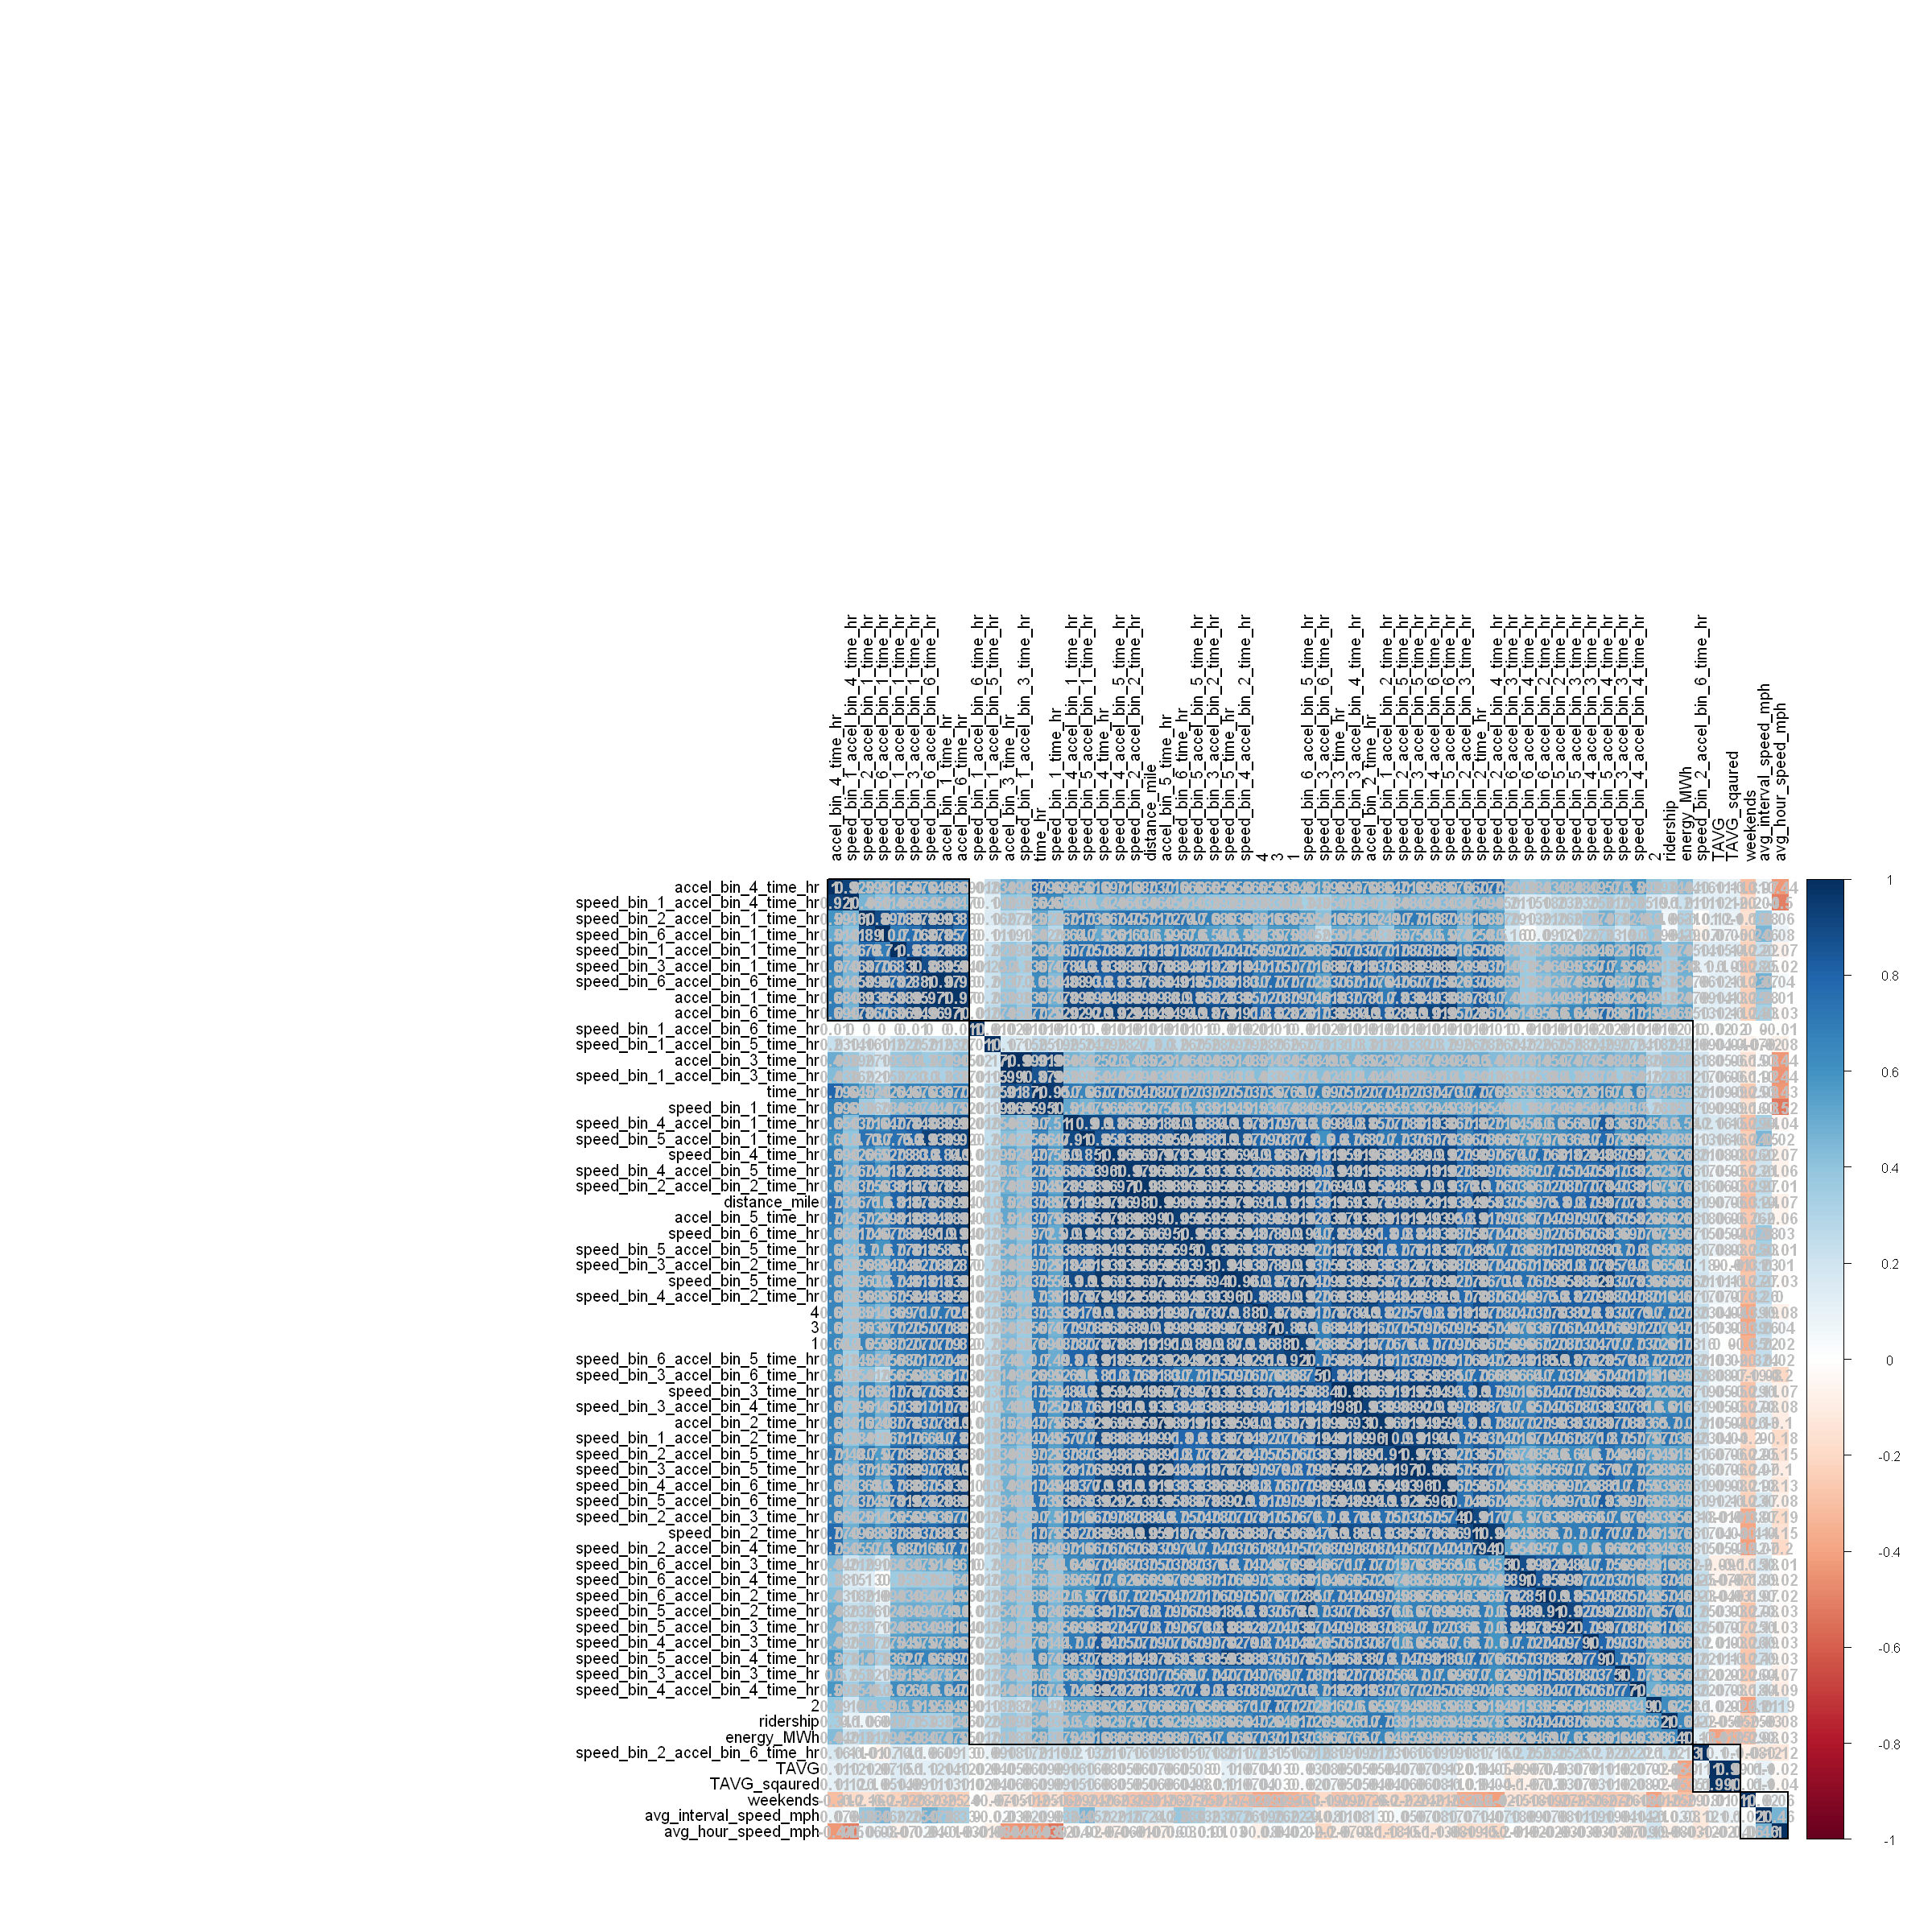

In [150]:
df_cor = correlation_plot(df)

In [33]:
# change variable name and data split for model estimation
set_split = function(df){
    colnames(df)[6] = "red"
    colnames(df)[7] = "blue"
    colnames(df)[8] = "orange"
    colnames(df)[9] = "green"
    df$num_trains = df$red + df$orange + df$blue + df$green
    df$month_factor = as.factor(df$month)
    df$TAVG_squared = I(df$TAVG^2)
    # remove all 0 variable
    #df = df[,-"speed_bin_1_accel_bin_6_time_hr"]
    set.seed(1234)
    train = df[year == "2019",]
    df_2019 = df[year == "2019",]
    rate = 0.8
    sub = sample(1:nrow(df_2019),round(nrow(df_2019)*rate)) # the split ratio is 0.8
    train = df_2019[sub,] # train set
    validation = df_2019[-sub,] # validation set
    test = df[year == "2020",] # test set
    train = na.omit(train)
    return(list(df_train = train, 
                df_validate = validation, 
                df_test = test))
}
dfh_train = set_split(agg_data)$df_train
dfh_validation = set_split(agg_data)$df_validate
dfh_test = set_split(agg_data)$df_test

In [13]:
list1 = c("num_trains",       
                              "speed_bin_1_time_hr",
                              "speed_bin_2_time_hr",
                              "speed_bin_3_time_hr",
                              "speed_bin_4_time_hr",
                              "speed_bin_5_time_hr",
                              "speed_bin_6_time_hr",
                              "accel_bin_1_time_hr",
                              "accel_bin_2_time_hr",
                             "accel_bin_3_time_hr",
                             "accel_bin_4_time_hr",
                             "accel_bin_5_time_hr",
                             "accel_bin_6_time_hr",
                             "speed_bin_1_accel_bin_1_time_hr",
                             "speed_bin_2_accel_bin_1_time_hr",
                             "speed_bin_3_accel_bin_1_time_hr",
                             "speed_bin_4_accel_bin_1_time_hr", 
                             "speed_bin_5_accel_bin_1_time_hr", 
                             "speed_bin_6_accel_bin_1_time_hr",
                             "speed_bin_1_accel_bin_2_time_hr",
                             "speed_bin_2_accel_bin_2_time_hr",
                             "speed_bin_3_accel_bin_2_time_hr", 
                             "speed_bin_4_accel_bin_2_time_hr",
                             "speed_bin_5_accel_bin_2_time_hr",
                             "speed_bin_6_accel_bin_2_time_hr",
                             "speed_bin_1_accel_bin_3_time_hr",
                             "speed_bin_2_accel_bin_3_time_hr",
                             "speed_bin_3_accel_bin_3_time_hr",
                             "speed_bin_4_accel_bin_3_time_hr",
                             "speed_bin_5_accel_bin_3_time_hr",
                             "speed_bin_6_accel_bin_3_time_hr",
                             "speed_bin_1_accel_bin_4_time_hr",
                             "speed_bin_2_accel_bin_4_time_hr",
                             "speed_bin_3_accel_bin_4_time_hr",
                             "speed_bin_4_accel_bin_4_time_hr",
                             "speed_bin_5_accel_bin_4_time_hr",
                             "speed_bin_6_accel_bin_4_time_hr",
                             "speed_bin_1_accel_bin_5_time_hr",
                             "speed_bin_2_accel_bin_5_time_hr",
                             "speed_bin_3_accel_bin_5_time_hr",
                             "speed_bin_4_accel_bin_5_time_hr",
                             "speed_bin_5_accel_bin_5_time_hr",
                             "speed_bin_6_accel_bin_5_time_hr",
                             "speed_bin_1_accel_bin_6_time_hr",
                             "speed_bin_2_accel_bin_6_time_hr",
                             "speed_bin_3_accel_bin_6_time_hr",
                             "speed_bin_4_accel_bin_6_time_hr",
                             "speed_bin_5_accel_bin_6_time_hr",
                             "speed_bin_6_accel_bin_6_time_hr",
                             "avg_interval_speed_mph", "avg_hour_speed_mph",
                             "distance_mile", "time_hr",
                              "weekends",
                              "month_factor",
                             "ridership", "TAVG")

In [14]:
Random_forest_energy <- randomForest(reformulate(list1,"energy_MWh"), data = dfh_train, mtry= 40, ntree = 500)


Call:
 randomForest(formula = reformulate(list1, "energy_MWh"), data = dfh_train,      mtry = 40, ntree = 500) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 40

          Mean of squared residuals: 3.112815
                    % Var explained: 95.43


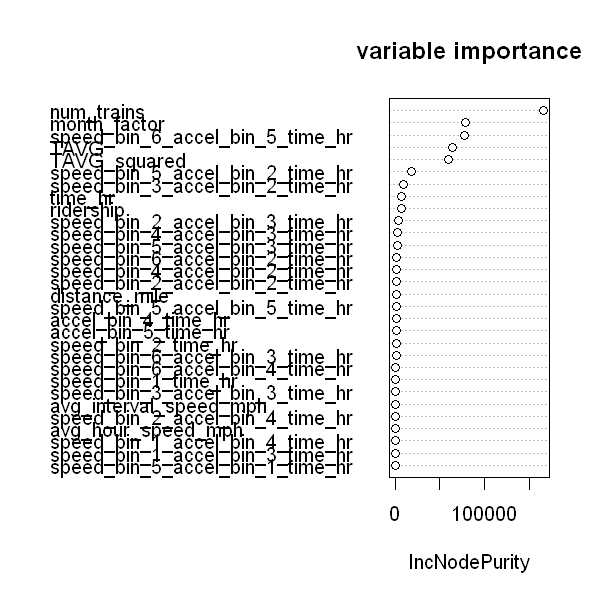

In [134]:
# Importance of each variable
varImpPlot(Random_forest_energy , main = "variable importance")
# Basic model information
print(Random_forest_energy)

# Random Forest

In [10]:
random_forest = function(split,num_trees){
    df = data.table("mtry" = c(18,25,32,40),"OOB error"= as.numeric(),"Train error"= as.numeric())
    seq = c(18,25,32,40)
#     mtry <- tuneRF(dfh_train[,..list1],dfh_train$energy_MWh, ntreeTry=500,
#                stepFactor=1.5,improve=0.01, trace=TRUE, plot=TRUE)
#    best.m <- mtry[mtry[, 2] == min(mtry[, 2]), 1]
#    print(mtry)
#    print(best.m)
    for (i in seq){
        Random_forest_energy <- randomForest(reformulate(list1,"energy_MWh"), data = dfh_train, mtry= i, ntree = num_trees)
        df[mtry == 18,"OOB error"] = 
    }
   Random_forest_energy <- randomForest(reformulate(list1,"energy_MWh"), data = dfh_train, mtry= i, ntree = num_trees)
   # Importance of each variable
   varImpPlot(Random_forest_energy , main = "variable importance")
   # Basic model information
   print(Random_forest_energy)
   # Number of nodes in each tree
   hist(treesize(Random_forest_energy))
   return(Random_forest_energy)
}

In [329]:
Random_forest_energy$predicted

1        2        3        4        5        6        7        8 
47.07295 47.56064 47.63077 47.90712 48.59784 48.92479 48.69344 48.67496 
       9       10       11       12       13       14       15       16 
49.38900 49.29741 47.60711 48.29923 47.38079 46.63391 39.18060 46.26890 
      17       18       19       20       21       22       23       24 
46.59288 47.06967 47.65776 50.09847 43.24746 61.17419 56.21503 55.19271 
      25       26       27       28       29       30       31       32 
55.83064 59.87243 62.27746 63.02039 64.01313 65.15930 62.43999 42.94584 
      33       34       35       36       37       38       39       40 
56.66653 54.91202 55.37639 55.64649 42.05753 50.02260 60.08755 63.86320 
      41       42       43       44       45       46       47       48 
65.31183 64.40963 53.67582 46.81665 62.77583 59.76508 59.00561 57.96559 
      49       50       51       52       53       54       55       56 
60.55458 65.20882 67.06538 67.55528 67.63982 64.73492 58.17006 58.68291 
      57       58       59       60       61       62       63       64 
59.39981 58.03582 43.63816 54.27643 64.60412 65.76398 66.53485 65.96344 
      65       66       67       68       69       70       71       72 
54.86818 49.13255 56.91799 56.89718 56.85984 56.63426 55.78872 57.48251 
      73       74       75       76       77       78       79       80 
56.22812 56.80005 56.68125 56.60599 56.49892 56.79808 55.52119 56.69327 
      81       82       83       84       85       86       87       88 
54.53259 54.94770 56.75237 57.53445 57.07553 54.51229 50.91891 54.12201 
      89       90       91       92       93       94       95       96 
54.33555 52.74885 53.48832 53.52304 53.51862 52.74135 53.82765 56.20238 
      97       98       99      100      101      102      103      104 
56.60259 53.97763 53.63968 54.78592 54.96931 50.23641 54.21504 55.02285 
     105      106      107      108      109      110      111      112 
54.88022 54.98479 49.76427 46.37862 60.50072 55.62993 55.98733 55.68418 
     113      114      115      116      117      118      119      120 
58.92480 61.39889 63.52878 63.96500 65.04048 59.21748 56.24967 55.79060 
     121      122      123      124      125      126      127      128 
55.45690 56.01471 44.56940 43.55526 51.82131 60.97989 63.26975 64.13257 
     129      130      131      132      133      134      135      136 
64.26842 51.73652 42.69289 60.59858 56.09032 55.18845 55.06603 57.24760 
     137      138      139      140      141      142      143      144 
61.28843 63.46629 63.50032 64.55237 60.94326 56.21432 54.65954 54.89456 
     145      146      147      148      149      150      151      152 
54.66953 42.40982 49.84989 60.96380 64.47526 64.17363 64.27879 52.25389 
     153      154      155      156      157      158      159      160 
43.23896 60.39343 56.24866 55.27912 56.11512 57.02733 62.83842 63.16731 
     161      162      163      164      165      166      167      168 
63.60715 63.74233 60.21332 56.92341 55.83832 54.84620 55.41805 41.50904 
     169      170      171      172      173      174      175      176 
50.47688 61.22149 66.47612 64.71748 64.60663 54.46851 46.68820 63.19820 
     177      178      179      180      181      182      183      184 
57.72834 58.18527 58.31035 58.34775 63.56030 66.43240 66.36981 66.59475 
     185      186      187      188      189      190      191      192 
64.48673 57.21439 58.05797 57.10558 56.64758 44.14000 53.40435 62.20183 
     193      194      195      196      197      198      199      200 
66.87189 67.25481 67.53408 50.00367 42.07839 58.99678 57.57598 56.25156 
     201      202      203      204      205      206      207      208 
55.59724 58.32337 62.74236 63.25744 63.63517 64.65035 61.80902 47.00009 
     209      210      211      212      213      214      215      216 
55.42060 55.54948 55.07300 55.53874 44.80593 42.42680 48.47091 59.97079 
     217      218      219      220      221      222      223   

In [24]:
 MSE = sqrt(mean((dfh_train$energy_MWh -  Random_forest_energy$predicted)^2,na.rm = TRUE))

In [23]:
mean(abs((dfh_train$energy_MWh - Random_forest_energy$predicted)/dfh_train$energy_MWh),na.rm =TRUE) * 100

[1] Inf

mtry = 18  OOB error = 4.906706 
Searching left ...
mtry = 12 	OOB error = 5.450737 
-0.110875 0.01 
Searching right ...
mtry = 27 	OOB error = 4.673521 
0.04752382 0.01 
mtry = 40 	OOB error = 4.64281 
0.006571336 0.01 
   mtry OOBError
12   12 5.450737
18   18 4.906706
27   27 4.673521
40   40 4.642810
[1] 40


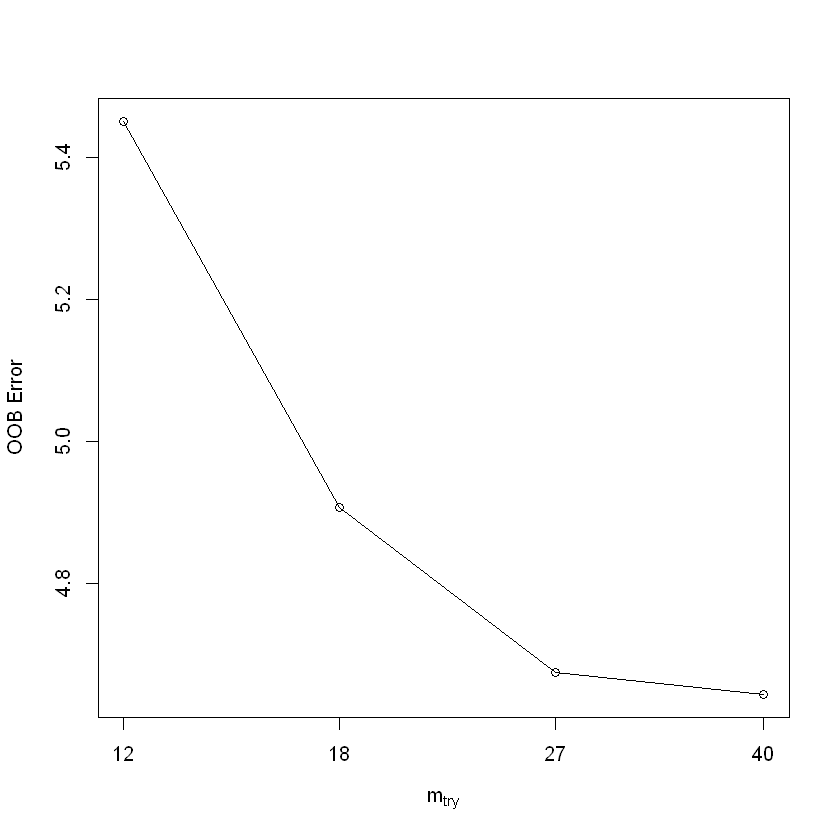


Call:
 randomForest(formula = reformulate(list1, "energy_MWh"), data = dfh_train,      mtry = split, ntree = num_trees) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 18

          Mean of squared residuals: 4.915361
                    % Var explained: 92.79


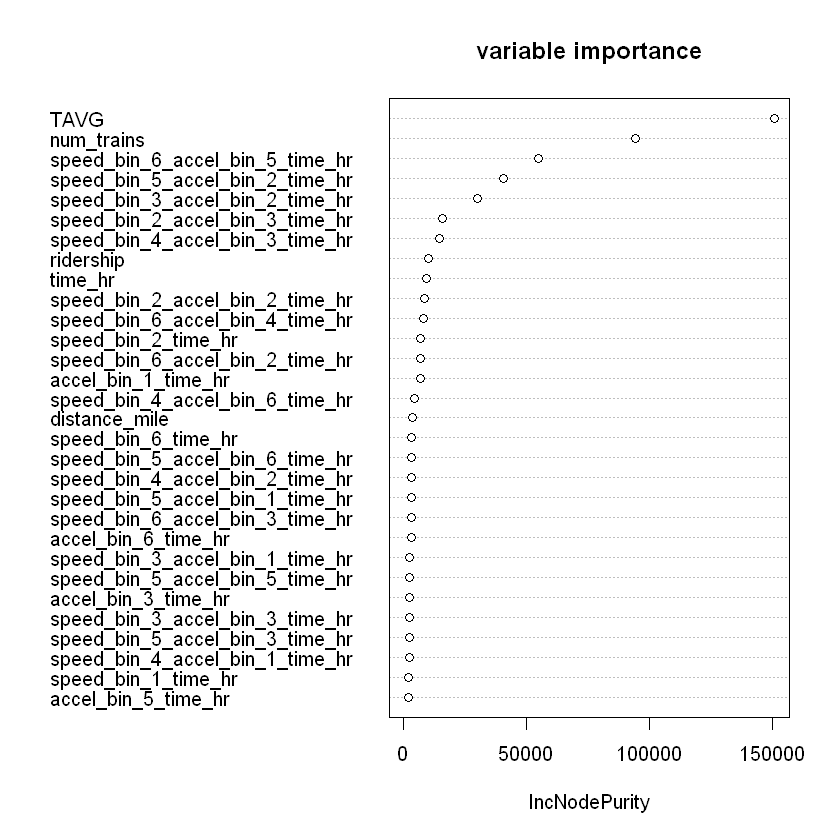

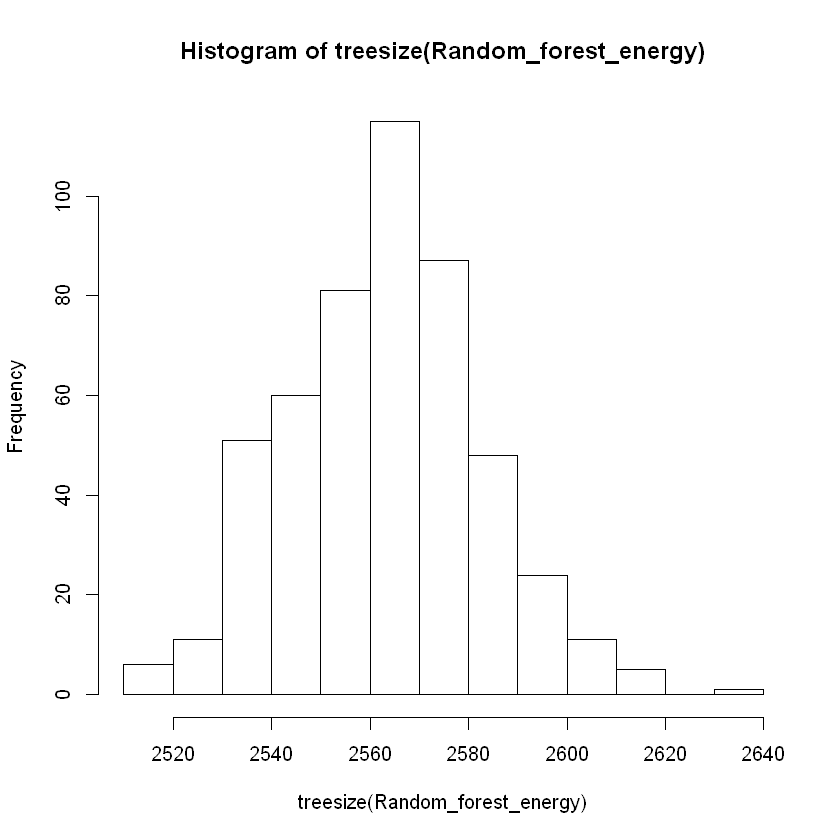

In [11]:
RF = random_forest(18,500)

In [223]:
RF_importance = data.frame(Random_forest_energy$importance)

In [224]:
RF_importance$ID = rownames(RF_importance)

In [226]:
RF_importance = RF_importance[order(RF_importance$IncNodePurity,decreasing=TRUE,na.last=FALSE),]

In [227]:
RF_importance = RF_importance[1:10,]

In [325]:
png("../../figures/figures for report/RF_importance.png",height=6500,width=9600,res=360)
ggplot(RF_importance, aes(IncNodePurity, reorder(ID, IncNodePurity)))+
  #xlim(-20,20) +
  geom_bar(stat="identity",fill="#1f78b4",width = 0.6) +
 theme_bw()+
  theme(axis.text=element_text(size = 35),axis.title.x = element_text(size = 40),axis.title.y = element_blank()) +
  #scale_color_gradient(low="blue",high = "red") +
  labs(x = "Increase in Node Purity")+
  guides(color = FALSE)
dev.off()

png 
  2

In [15]:
pred <- predict(Random_forest_energy, newdata = dfh_test) 
print(paste("RMSE:",sqrt(mean((dfh_test$energy_MWh - pred)^2,na.rm = TRUE))))
print(paste("MAPE:",mean(abs((dfh_test$energy_MWh - pred)/dfh_test$energy_MWh),na.rm =TRUE) * 100))
test_compare = data.frame("Observed" = dfh_test$energy_MWh, "Predicted" = pred, "Residual" =  dfh_test$energy_MWh - pred,
                          "Hour" = dfh_test$hour,"Year" = dfh_test$year,"Day"  = dfh_test$day,"Month" = dfh_test$month)
test_compare$Date = with(test_compare, ISOdatetime(Year,  Month, Day, Hour, 0, 0))
test_compare_melt = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date","Residual"),
                measure.vars = c("Predicted","Observed"),variable.name = "type",value.name = "value")

[1] "RMSE: 2.94439379166579"
[1] "MAPE: 5.0053128700945"


Warning message in melt(test_compare, id.vars = c("Hour", "Year", "Day", "Month", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(test_compare). In the next version, this warning will become an error."


In [16]:
RF_compare_table = test_compare_melt

In [78]:
d1$Dateseries = as.Date(d1$Date,format = format = "%Y-m%-d%-")

In [22]:
# png("../../figures/Random forest.png",height=2700,width=8000,res=360)
#interaction(Set,type,sep="-",lex.order=TRUE)
#options(repr.plot.width = 60, repr.plot.height = 10)
p1 = ggplot(test_compare_melt) + 
#ylim(30,70) +
 geom_line(aes(x = Date, y = value, color = type)
           ,size = 1.5,alpha = 0.6) +
  geom_point(aes(x = Date , y = value, color = type)
             ,size = 1.5, alpha = 0.6) + 
    #geom_errorbar(aes(x = Date, y = value, ymin = CI_lower, ymax=CI_upper, color = ""), width=.2,
#                  position=position_dodge(0.05)) +
    theme_bw() + 
    theme(axis.text = element_text(size=30), axis.title.x = element_blank(),title = element_text(size=35),
         legend.text = element_text(size = 30), legend.title = element_blank(),
        axis.title.y = element_blank(),
         legend.key.size = unit(3, 'cm'),
         panel.grid = element_line(size = 0.9)) + 
    labs(#title ="Random Forests", 
      y = "Energy consumption (MWh)", x = "Date") +
   scale_x_datetime(date_breaks ="1 month",date_labels = ("%m/%y")) +
   scale_color_manual(values=c("#fc8d62", "#8da0cb"))
# dev.off()

In [23]:
png("../../figures/Random forest.png",height=2700,width=8000,res=360)
p1
dev.off()

Warning message:
"Removed 4 row(s) containing missing values (geom_path)."
Warning message:
"Removed 804 rows containing missing values (geom_point)."


png 
  2

In [ ]:
# find the best split
rate=1
for(i in 1:55){
  set.seed(1234)
  rf_train<-randomForest(reformulate(list1,"energy_MWh"), data = dfh_train,mtry=i,ntree=1000)
  rate[i]<-mean(rf_train$err.rate) 
  print(rf_train)    
}
plot(rate)

# GAM

In [35]:
# Estimate energy GAM model
energy_gam_model <- gam(reformulate(list1,"energy_MWh"), data = dfh_train)
summary(energy_gam_model)


Family: gaussian 
Link function: identity 

Formula:
energy_MWh ~ num_trains + speed_bin_1_time_hr + speed_bin_2_time_hr + 
    speed_bin_3_time_hr + speed_bin_4_time_hr + speed_bin_5_time_hr + 
    speed_bin_6_time_hr + accel_bin_1_time_hr + accel_bin_2_time_hr + 
    accel_bin_3_time_hr + accel_bin_4_time_hr + accel_bin_5_time_hr + 
    accel_bin_6_time_hr + speed_bin_1_accel_bin_1_time_hr + speed_bin_2_accel_bin_1_time_hr + 
    speed_bin_3_accel_bin_1_time_hr + speed_bin_4_accel_bin_1_time_hr + 
    speed_bin_5_accel_bin_1_time_hr + speed_bin_6_accel_bin_1_time_hr + 
    speed_bin_1_accel_bin_2_time_hr + speed_bin_2_accel_bin_2_time_hr + 
    speed_bin_3_accel_bin_2_time_hr + speed_bin_4_accel_bin_2_time_hr + 
    speed_bin_5_accel_bin_2_time_hr + speed_bin_6_accel_bin_2_time_hr + 
    speed_bin_1_accel_bin_3_time_hr + speed_bin_2_accel_bin_3_time_hr + 
    speed_bin_3_accel_bin_3_time_hr + speed_bin_4_accel_bin_3_time_hr + 
    speed_bin_5_accel_bin_3_time_hr + speed_bin_6_accel_

# Linear regression - select model manually

In [322]:
write.csv(m2_result,"../../data/tidy/m2_coe.csv")

In [5]:
# MLR variables
list3 = c("num_trains",
                             "speed_bin_1_accel_bin_1_time_hr",
                             "speed_bin_2_accel_bin_1_time_hr",
                             "speed_bin_3_accel_bin_1_time_hr",
                             "speed_bin_4_accel_bin_1_time_hr", 
                             "speed_bin_5_accel_bin_1_time_hr", 
                             #"speed_bin_6_accel_bin_1_time_hr",
                             "speed_bin_1_accel_bin_2_time_hr",
                             "speed_bin_2_accel_bin_2_time_hr",
                             "speed_bin_3_accel_bin_2_time_hr", 
                             #"speed_bin_4_accel_bin_2_time_hr",
                             "speed_bin_5_accel_bin_2_time_hr",
                             #"speed_bin_6_accel_bin_2_time_hr",
                             #"speed_bin_1_accel_bin_3_time_hr",
                             "speed_bin_2_accel_bin_3_time_hr",
                             "speed_bin_3_accel_bin_3_time_hr",
                             "speed_bin_4_accel_bin_3_time_hr",
                             "speed_bin_5_accel_bin_3_time_hr",
                             "speed_bin_6_accel_bin_3_time_hr",
                             #"speed_bin_1_accel_bin_4_time_hr",
                             "speed_bin_2_accel_bin_4_time_hr",
                             #"speed_bin_3_accel_bin_4_time_hr",
                             "speed_bin_4_accel_bin_4_time_hr",
                             "speed_bin_5_accel_bin_4_time_hr",
                             "speed_bin_6_accel_bin_4_time_hr",
                             #"speed_bin_1_accel_bin_5_time_hr",
                             "speed_bin_2_accel_bin_5_time_hr",
                             "speed_bin_3_accel_bin_5_time_hr",
                             "speed_bin_4_accel_bin_5_time_hr",
                             #"speed_bin_5_accel_bin_5_time_hr",
                             "speed_bin_6_accel_bin_5_time_hr",
                             #"speed_bin_1_accel_bin_6_time_hr",
                             #"speed_bin_2_accel_bin_6_time_hr",
                             "speed_bin_3_accel_bin_6_time_hr",
                             #"speed_bin_4_accel_bin_6_time_hr",
                             "speed_bin_5_accel_bin_6_time_hr",
                             "speed_bin_6_accel_bin_6_time_hr",
                             #avg_interval_"speed_mph", avg_hour_speed_mph",
                             "ridership", "TAVG", "I(TAVG^2)", "month_factor")

In [560]:
list4 = c("num_trains", "distance_mile"," time_hr"," speed_bin_3_time_hr", 
         " speed_bin_5_time_hr", "accel_bin_2_time_hr" ,"accel_bin_3_time_hr"," accel_bin_4_time_hr", 
                                #"accel_bin_5_time_hr",                
#                             "speed_bin_1_accel_bin_1_time_hr",
#                              "speed_bin_2_accel_bin_1_time_hr",
#                              "speed_bin_3_accel_bin_1_time_hr",
#                              "speed_bin_4_accel_bin_1_time_hr", 
                             "speed_bin_5_accel_bin_1_time_hr", 
#                              "speed_bin_6_accel_bin_1_time_hr",
#                              "speed_bin_1_accel_bin_2_time_hr",
#                              "speed_bin_2_accel_bin_2_time_hr",
#                              "speed_bin_3_accel_bin_2_time_hr", 
#                              "speed_bin_4_accel_bin_2_time_hr",
                             "speed_bin_5_accel_bin_2_time_hr",
#                              "speed_bin_6_accel_bin_2_time_hr",
#                              "speed_bin_1_accel_bin_3_time_hr",
#                              "speed_bin_2_accel_bin_3_time_hr",
#                              "speed_bin_3_accel_bin_3_time_hr",
                             "speed_bin_4_accel_bin_3_time_hr",
                             "speed_bin_5_accel_bin_3_time_hr",
#                              "speed_bin_6_accel_bin_3_time_hr",
#                              "speed_bin_1_accel_bin_4_time_hr",
#                              "speed_bin_2_accel_bin_4_time_hr",
                             "speed_bin_3_accel_bin_4_time_hr",
#                              "speed_bin_4_accel_bin_4_time_hr",
                             "speed_bin_5_accel_bin_4_time_hr",
#                              "speed_bin_6_accel_bin_4_time_hr",
#                              "speed_bin_1_accel_bin_5_time_hr",
#                              "speed_bin_2_accel_bin_5_time_hr",
                             "speed_bin_3_accel_bin_5_time_hr",
#                              "speed_bin_4_accel_bin_5_time_hr",
                             "speed_bin_5_accel_bin_5_time_hr",
#                              "speed_bin_6_accel_bin_5_time_hr",
#                              "speed_bin_1_accel_bin_6_time_hr",
#                              "speed_bin_2_accel_bin_6_time_hr",
#                              "speed_bin_3_accel_bin_6_time_hr",
#                              "speed_bin_4_accel_bin_6_time_hr",
#                              "speed_bin_5_accel_bin_6_time_hr",
#                              "speed_bin_6_accel_bin_6_time_hr",
                             "avg_interval_speed_mph", 
                              #avg_hour_speed_mph",
                             "ridership", "TAVG", "I(TAVG^2)", "month_factor")

In [530]:
list2 = c("num_trains",
                             "speed_bin_1_accel_bin_1_time_hr",
                             "speed_bin_2_accel_bin_1_time_hr",
                             "speed_bin_3_accel_bin_1_time_hr",
                             "speed_bin_4_accel_bin_1_time_hr", 
                             "speed_bin_5_accel_bin_1_time_hr", 
                             "speed_bin_6_accel_bin_1_time_hr",
                             "speed_bin_1_accel_bin_2_time_hr",
                             "speed_bin_2_accel_bin_2_time_hr",
                             "speed_bin_3_accel_bin_2_time_hr", 
                             "speed_bin_4_accel_bin_2_time_hr",
                             "speed_bin_5_accel_bin_2_time_hr",
                             "speed_bin_6_accel_bin_2_time_hr",
                             "speed_bin_1_accel_bin_3_time_hr",
                             "speed_bin_2_accel_bin_3_time_hr",
                             "speed_bin_3_accel_bin_3_time_hr",
                             "speed_bin_4_accel_bin_3_time_hr",
                             "speed_bin_5_accel_bin_3_time_hr",
                             "speed_bin_6_accel_bin_3_time_hr",
                             "speed_bin_1_accel_bin_4_time_hr",
                             "speed_bin_2_accel_bin_4_time_hr",
                             "speed_bin_3_accel_bin_4_time_hr",
                             "speed_bin_4_accel_bin_4_time_hr",
                             "speed_bin_5_accel_bin_4_time_hr",
                             "speed_bin_6_accel_bin_4_time_hr",
                             "speed_bin_1_accel_bin_5_time_hr",
                             "speed_bin_2_accel_bin_5_time_hr",
                             "speed_bin_3_accel_bin_5_time_hr",
                             "speed_bin_4_accel_bin_5_time_hr",
                             "speed_bin_5_accel_bin_5_time_hr",
                             "speed_bin_6_accel_bin_5_time_hr",
                             "speed_bin_1_accel_bin_6_time_hr",
                             "speed_bin_2_accel_bin_6_time_hr",
                             "speed_bin_3_accel_bin_6_time_hr",
                             "speed_bin_4_accel_bin_6_time_hr",
                             "speed_bin_5_accel_bin_6_time_hr",
                             "speed_bin_6_accel_bin_6_time_hr",
                             #avg_interval_"speed_mph", avg_hour_speed_mph",
                             "ridership", "TAVG", "I(TAVG^2)", "month_factor")

In [34]:
model_2 = function(train_set,validation_set,var_names){
    linear_select_model  = lm(reformulate(var_names,"energy_MWh"),data = train_set)
    options(repr.plot.width = 5, repr.plot.height = 5)
    # plot(linear_select_model)
    print(summary(linear_select_model))
    pred_linear <- predict.lm(linear_select_model, validation_set,interval = 'confidence')
    pred_linear = data.frame(pred_linear)
#     print(dim(pred_linear))
#      print(dim(validation_set))
    test_compare = data.frame("Observed" = validation_set$energy_MWh, "Predicted" = pred_linear$fit, "CI_lower" = pred_linear$lwr,
                              "CI_upper" = pred_linear$upr, 
#                               Veh_mile" = validation_set$distance_mile, "Veh-hour" = validation_set$time_hr
                               "Hour" = validation_set$hour, "Year" = validation_set$year, "Day"  = validation_set$day, "Month" = validation_set$month, 
                              "Residual" =  validation_set$energy_MWh - pred_linear$fit, "Set" = "Test")
#     pred_linear_train <- predict.lm(linear_select_model, train_set,interval = 'confidence')
#     pred_linear_train = data.frame(pred_linear_train)
#     test_compare_train = data.frame("Observed" = train_set$energy_MWh, "Predicted" = pred_linear_train$fit, "CI_lower" = pred_linear_train$lwr,
#                               "CI_upper" = pred_linear_train$upr, 
#                                "Hour" = train_set$hour, "Year" = train_set$year, "Day"  = train_set$day, "Month" = train_set$month, 
#                               "Residual" =  train_set$energy_MWh - pred_linear_train$fit, "Set" = "Train")
#     test_compare = rbind(test_compare, test_compare_train)
    test_compare$Date = with(test_compare, ISOdatetime(Year,  Month, Day, Hour, 0, 0))
#     # Calculate the MSE of ridge
      MSE = sqrt(mean((test_compare$Observed - test_compare$Predicted)^2,na.rm = TRUE))
     print(MSE)
#     #Calculate MAPE of ridge
     MAPE = mean(abs((test_compare$Observed - test_compare$Predicted)/test_compare$Observed),na.rm =TRUE) * 100
     print(MAPE)
     test_compare_melt = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date","CI_lower","CI_upper","Residual", "Set"),
                measure.vars = c("Predicted","Observed"),variable.name = "type",value.name = "value")
    return(test_compare_melt)
    }

In [35]:
model_2_test = model_2(dfh_train,dfh_validation,list3)


Call:
lm(formula = reformulate(var_names, "energy_MWh"), data = train_set)

Residuals:
    Min      1Q  Median      3Q     Max 
-41.372  -1.194  -0.038   1.153  14.272 

Coefficients:
                                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)                      5.848e+01  3.109e-01 188.072  < 2e-16 ***
num_trains                       6.488e-02  2.550e-03  25.447  < 2e-16 ***
speed_bin_1_accel_bin_1_time_hr -3.809e-01  9.766e-02  -3.900 9.72e-05 ***
speed_bin_2_accel_bin_1_time_hr -2.290e-01  1.085e-01  -2.110 0.034876 *  
speed_bin_3_accel_bin_1_time_hr  5.861e-01  1.540e-01   3.806 0.000142 ***
speed_bin_4_accel_bin_1_time_hr -1.870e-01  9.701e-02  -1.927 0.053963 .  
speed_bin_5_accel_bin_1_time_hr -8.100e-01  1.658e-01  -4.886 1.06e-06 ***
speed_bin_1_accel_bin_2_time_hr  1.322e-01  2.625e-02   5.038 4.83e-07 ***
speed_bin_2_accel_bin_2_time_hr  1.397e-01  5.053e-02   2.764 0.005732 ** 
speed_bin_3_accel_bin_2_time_hr  1.233e+00  1.692e-01   7.288 3.5

Warning message in melt(test_compare, id.vars = c("Hour", "Year", "Day", "Month", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(test_compare). In the next version, this warning will become an error."


In [32]:
dfh_validation

NULL

In [42]:
dfh_com = rbind(dfh_train,dfh_validation)

In [10]:
table_combine$Linear_res = model_2_test$Residual

In [18]:
table_combine$Date = RF_compare_table$Date
table_combine$Linear_res = model_2_test$Residual
table_combine$RF_res = RF_compare_table$Residual

In [19]:
colnames(table_combine)[2] = "Linear Regression"
colnames(table_combine)[3] = "Random Forests"

In [20]:
table_combine_melt = melt(table_combine, id.vars=c("Date"),
                measure.vars = c("Linear Regression","Random Forests"),variable.name = "type",value.name = "value")

In [21]:
#options(repr.plot.width = 50, repr.plot.height = 10)
p3 = ggplot(table_combine_melt) + 
 geom_line(aes(x = Date, y = value, color = type)
           ,size = 1.5, alpha = 0.6) +
  geom_point(aes(x = Date,  y = value, color = type)
             ,size = 1.5, alpha = 0.6) + 
    #geom_errorbar(aes(x = Date, y = value, ymin = CI_lower, ymax=CI_upper, color = ""), width=.2,
#                  position=position_dodge(0.05)) +
    theme_bw() +
    theme(axis.text = element_text(size=30), axis.title.x = element_blank(),title = element_text(size=35),
         legend.text = element_text(size = 30), legend.title = element_blank(),
        axis.title.y = element_blank(),
         legend.key.size = unit(3, 'cm'),
         panel.grid = element_line(size = 0.9)) + 
     scale_color_manual(values=c("#fc8d62", "#8da0cb")) +
     labs(title =" Residuals", 
      y = "Energy consumption (MWh)", x = "Date") +
     scale_x_datetime(date_breaks ="1 month",date_labels = ("%m/%y"))

In [251]:
linear_test_compare = model_2_test

In [148]:
df_model = data.frame(m$coefficients)

In [33]:
write.csv(df_model,"../../data/tidy/model_2_coe.csv")

In [39]:
results_plot = function(df){

#png("../../figures/lasso performance-M2-train.png",height=4000,width=9000,res=360)
#interaction(Set,type,sep="-",lex.order=TRUE)
 options(repr.plot.width = 50, repr.plot.height = 10)
 ggplot(df) + 
 ylim(30,70) +
 geom_line(aes(x = Date, y = value, color = type)
           ,size = 1.5, alpha = 0.6) +
  geom_point(aes(x = Date,  y = value, color = type)
             ,size = 1.5, alpha = 0.6) + 
    #geom_errorbar(aes(x = Date, y = value, ymin = CI_lower, ymax=CI_upper, color = ""), width=.2,
#                  position=position_dodge(0.05)) +
    theme_bw() +
    theme(axis.text = element_text(size=30), axis.title.x = element_blank(),title = element_text(size=35),
         legend.text = element_text(size = 30), legend.title = element_blank(),
        axis.title.y = element_blank(),
         legend.key.size = unit(3, 'cm'),
         panel.grid = element_line(size = 0.9)) + 
     scale_color_manual(values=c("#fc8d62", "#8da0cb")) +
    labs(#title ="  Linear Regression", 
      y = "Energy consumption (MWh)", x = "Date") + 
     scale_x_datetime(date_breaks ="1 month",date_labels = ("%m/%y"))
#dev.off()
    }

In [44]:
p2 = results_plot(model_2_test)

In [288]:
#options(repr.plot.width = 70, repr.plot.height = 50)

p = ggarrange(p2 + rremove("xlab"),ggplot() + theme_void(),p1 + rremove("xlab"), ggplot() + theme_void(), p3 + rremove("xlab"), nrow = 5, 
              ncol = 1,heights = c(1, 0.1, 1, 0.1, 1))
#           common.legend = TRUE,legend = "bottom")  
# %>% 
#      ggexport(filename = "../../figures/figures for report/model performance.png",width = 1500, height = 700)
p_final = annotate_figure(p, left = text_grob("Energy consumption (MWh)", rot = 90,size = 60))

Warning message:
"Removed 4 row(s) containing missing values (geom_path)."
Warning message:
"Removed 1426 rows containing missing values (geom_point)."
Warning message:
"Removed 4 row(s) containing missing values (geom_path)."
Warning message:
"Removed 804 rows containing missing values (geom_point)."
Warning message:
"Removed 16 row(s) containing missing values (geom_path)."
Warning message:
"Removed 3216 rows containing missing values (geom_point)."


In [22]:
png("../../figures/residual.png",height=2700,width=8000,res=360)
p3
dev.off()

Warning message:
"Removed 16 row(s) containing missing values (geom_path)."
Warning message:
"Removed 3216 rows containing missing values (geom_point)."


png 
  2

# linear regression

In [ ]:
#png("../../figures/lasso performance-2020.png",height=4000,width=9000,res=360)
options(repr.plot.width = 50, repr.plot.height = 25)
ggplot( test_compare_plot_lasso) + 
ylim(30,70) +
 geom_point(aes(x = Date, y = x,color = type,),size = 5) +
 theme(axis.text=element_text(size = 25),axis.title.x = element_text(size = 30),axis.title.y = element_text(size = 30),title= element_blank(),
       legend.text = element_text(size = 25)) +
 labs(title =" Lasso model performance", y = "Energy consumption (MWh)", x = "Date", color = "Model") 
#dev.off()

In [361]:
lasso_result =  data.frame(linear$coefficients)
lasso_result$ID = rownames(lasso_result)

In [342]:
lasso
lasso_predict = predict(lasso,dfh_test,s = c(0.001, 0.002), gamma = "gamma.min")


Call:  cv.glmnet(x = x, y = y, alpha = 1, family = "gaussian") 

Measure: Mean-Squared Error 

     Lambda Index Measure     SE Nonzero
min 0.00114    93   6.938 0.2999      50
1se 0.02238    61   7.208 0.3002      34

ERROR: Error in cbind2(1, newx) %*% nbeta: not-yet-implemented method for <data.frame> %*% <dgCMatrix>


In [334]:
png("../../figures/lasso_coe_2019_train.png",height=4500,width=6000,res=360)
ggplot(var_name,aes(coef, reorder(var_names,coef),color = "darkorange")) +
  xlim(-20,20) +
  geom_point(size = 10,alpha = 0.4) +
  theme(axis.text=element_text(size = 20),axis.title.x = element_text(size = 40),axis.title.y = element_text(size = 40),title= element_text(size = 40),
        legend.text = element_text(size = 35)) +
  #scale_color_gradient(low="blue",high = "red") +
  labs(title = "Lasso regression", x = "Coefficient", y = NULL)+
  guides(color = FALSE)
dev.off()

Warning message:
"Removed 1 rows containing missing values (geom_point)."


png 
  2

In [614]:
lasso_regression = function(train_set,validate_set,test_set){
    train_set = rbind(train_set,validate_set)
    train_set = train_set[,-"speed_bin_1_accel_bin_6_time_hr"]
    train_set = train_set[,-"weekends"]
    train_set = train_set[,-"month_factor"]
    print(colnames(train_set))
    train_set = na.omit(train_set)
    x = train_set[,-(1:5)]
    x = x[,-"energy_MWh"]
    x = na.omit(x)
    y = train_set$energy_MWh
    y = as.matrix(y)
    x = data.matrix(x)
    x = scale(x, center = TRUE, scale = TRUE)
    set.seed(1)
    lasso <- cv.glmnet(x = x, y = y, alpha = 1, family = 'gaussian')
    var_name = get_coe(lasso,lasso$lambda.min)
#     var_name = var_name[-1,]
#     modelFit_hour_linear = lm(reformulate(var_name$var_names,"energy_MWh"),data = train_set)
#     linear = summary(modelFit_hour_linear)
#     pred_linear <- predict.lm(modelFit_hour_linear, dfh_test)
#     test_compare = data.frame("Observed" = dfh_test$energy_MWh, " Linear_model" = pred_linear,
#                           "Hour" = dfh_test$hour,"Year" = dfh_test$year,"Day"  = dfh_test$day,"Month" = dfh_test$month)
#     test_compare$Date = with(test_compare, ISOdatetime(Year,  Month, Day, Hour, 0, 0))
#     colnames(test_compare)[2] <- 'Predicted'
#     # Calculate the MSE of ridge
#     lasso_MSE = sqrt(mean((test_compare$Observed - test_compare$Predicted)^2,na.rm = TRUE))
#     print(lasso_MSE)
#     #Calculate MAPE of ridge
#     lasso_MAPE = mean(abs((test_compare$Observed - test_compare$Predicted)/test_compare$Observed),na.rm =TRUE) * 100
#     print(lasso_MAPE)
#     test_compare_plot_lasso = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date"),
#                 measure.vars = c("Predicted","Observed"),variable.name = "type",value.name = "x")
    return(var_name)
}

In [615]:
lasso_var = lasso_regression(dfh_train,dfh_validation,dfh_test)

 [1] "V1"                              "year"                           
 [3] "month"                           "day"                            
 [5] "hour"                            "red"                            
 [7] "blue"                            "orange"                         
 [9] "green"                           "distance_mile"                  
[11] "time_hr"                         "speed_bin_1_time_hr"            
[13] "speed_bin_2_time_hr"             "speed_bin_3_time_hr"            
[15] "speed_bin_4_time_hr"             "speed_bin_5_time_hr"            
[17] "speed_bin_6_time_hr"             "accel_bin_1_time_hr"            
[19] "accel_bin_2_time_hr"             "accel_bin_3_time_hr"            
[21] "accel_bin_4_time_hr"             "accel_bin_5_time_hr"            
[23] "accel_bin_6_time_hr"             "speed_bin_1_accel_bin_1_time_hr"
[25] "speed_bin_2_accel_bin_1_time_hr" "speed_bin_3_accel_bin_1_time_hr"
[27] "speed_bin_4_accel_bin_1_time_hr" "speed_bin_5

ERROR: Error in glmnet(x, y, weights = weights, offset = offset, lambda = lambda, : number of observations in y (8000) not equal to the number of rows of x (7825)


Warning message:
"Removed 137 rows containing missing values (geom_point)."


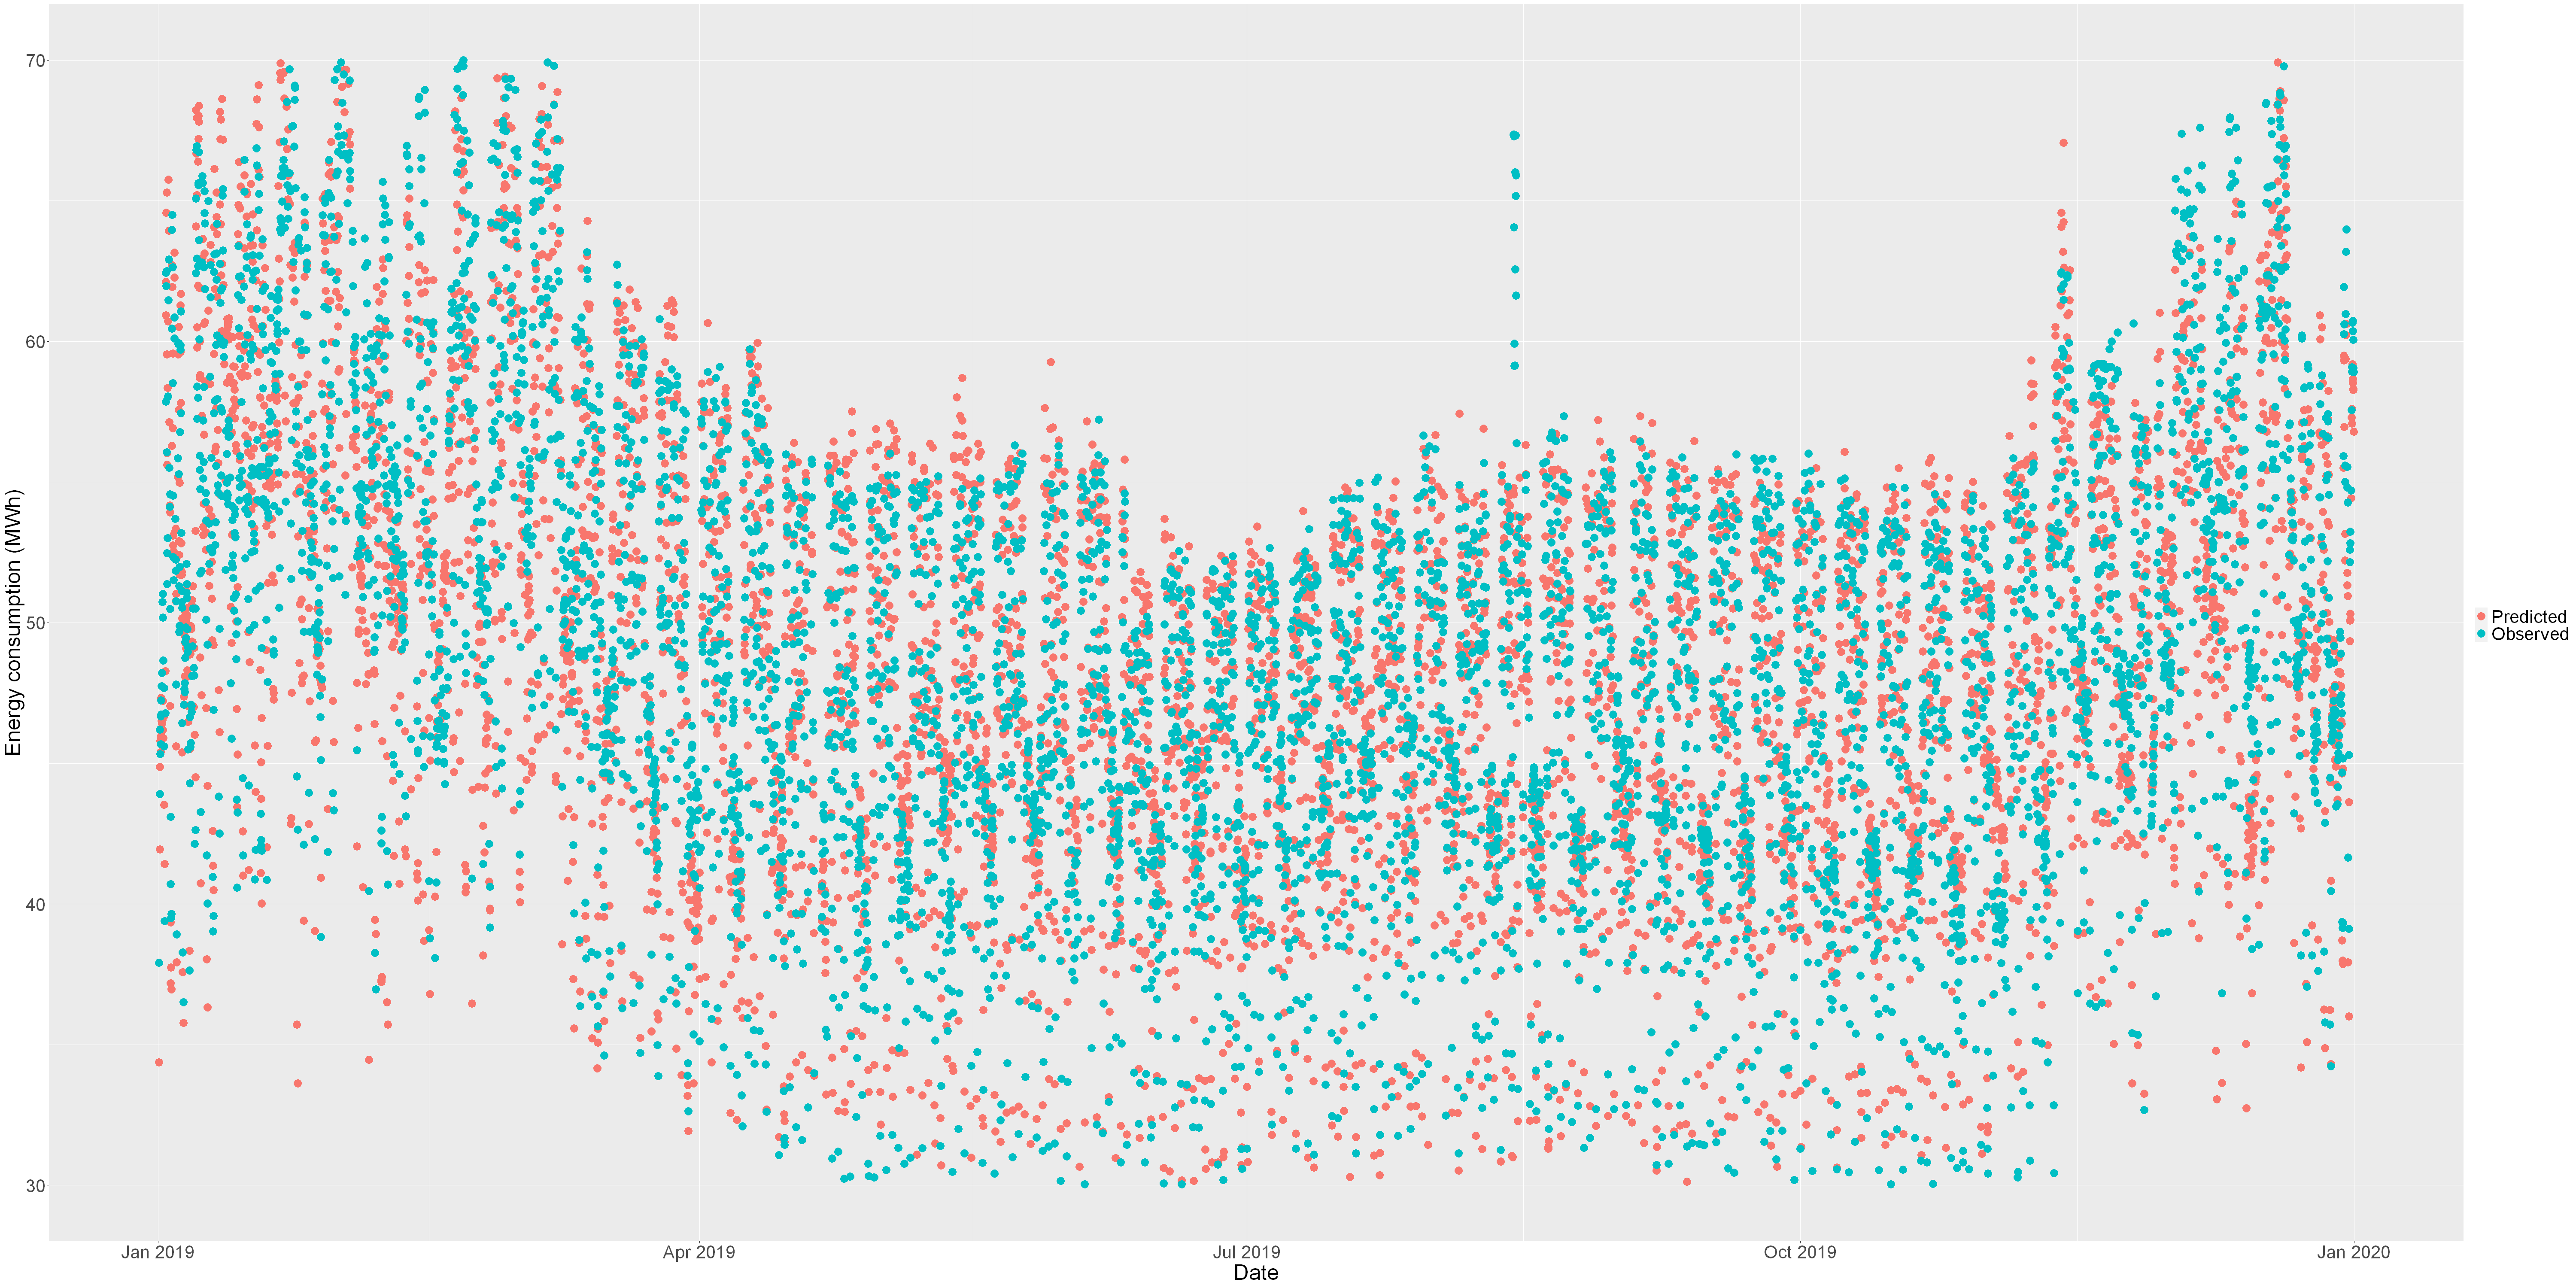

In [370]:
#png("../../figures/lasso performance-2020.png",height=4000,width=9000,res=360)
options(repr.plot.width = 50, repr.plot.height = 25)
ggplot( test_compare_plot_lasso) + 
ylim(30,70) +
 geom_point(aes(x = Date, y = x,color = type,),size = 5) +
 theme(axis.text=element_text(size = 25),axis.title.x = element_text(size = 30),axis.title.y = element_text(size = 30),title= element_blank(),
       legend.text = element_text(size = 25)) +
 labs(title =" Lasso model performance", y = "Energy consumption (MWh)", x = "Date", color = "Model") 
#dev.off()

In [26]:
get_coe <- function(the_fit,the_lamb){
  Coefficients <- coef(the_fit, s = the_lamb)
  Active.Index <- which(Coefficients != 0)
  Active.Coefficients <- Coefficients[Active.Index]
  re <- data.frame(rownames(Coefficients)[Active.Index],Active.Coefficients)
  re <- data.table('var_names'=rownames(Coefficients)[Active.Index],
                   'coef'=Active.Coefficients)
  return(re)
}

In [143]:
lasso_result$ID = rownames(lasso_result)

In [145]:
png("../../figures/lasso_coe_2020.png",height=4000,width=6000,res=360)
ggplot(lasso_result,aes(Estimate, reorder(ID,Estimate), color = Pr...t..)) +
  xlim(-3,2.5) +
  geom_point(size = 10,alpha = 0.4) +
  theme(axis.text=element_text(size = 20),axis.title.x = element_text(size = 40),axis.title.y = element_text(size = 40),title= element_text(size = 40),
        legend.text = element_text(size = 35)) +
  scale_color_gradient(low="blue",high = "red") +
  labs(title = "Lasso regression", x = "Coefficient", y = NULL , color = "P value")+
  guides(color = guide_legend(override.aes = list(size = 0.1)))
dev.off()

Warning message:
"Removed 11 rows containing missing values (geom_point)."


png 
  2

In [192]:
get_coe <- function(the_fit,the_lamb){
  Coefficients <- coef(the_fit, s = the_lamb)
  Active.Index <- which(Coefficients != 0)
  Active.Coefficients <- Coefficients[Active.Index]
  re <- data.frame(rownames(Coefficients)[Active.Index],Active.Coefficients)
  re <- data.table('var_names'=rownames(Coefficients)[Active.Index],
                   'coef'=Active.Coefficients)
  return(re)
}

In [218]:
linear_regression = function(df){
#     # Split the hour data by rate
#     set.seed(1234)
#     rate = 0.8
#     sub = sample(1:nrow(df),round(nrow(df)*rate))#the split ratio is 0.8
#     train_set = df[sub,]
#     dfh_test = df[-sub,]
    # linear regression
    modelFit_hour_linear= lm(energy_MWh ~ 1 + 2 + 3 + 4 +
                             accel_bin_4_time_hr + 
                             speed_bin_1_accel_bin_1_time_hr +
                             speed_bin_2_accel_bin_1_time_hr +
                             speed_bin_3_accel_bin_1_time_hr +
                             speed_bin_4_accel_bin_1_time_hr + 
                             speed_bin_6_accel_bin_1_time_hr +
                             speed_bin_1_accel_bin_2_time_hr +
                             speed_bin_2_accel_bin_2_time_hr +
                             speed_bin_5_accel_bin_2_time_hr +
                             speed_bin_6_accel_bin_2_time_hr +
                             speed_bin_2_accel_bin_3_time_hr +
                             speed_bin_3_accel_bin_3_time_hr +
                             speed_bin_4_accel_bin_3_time_hr +
                             speed_bin_6_accel_bin_3_time_hr +
                             speed_bin_1_accel_bin_4_time_hr +
                             speed_bin_2_accel_bin_4_time_hr +
                             speed_bin_5_accel_bin_4_time_hr +
                             speed_bin_6_accel_bin_4_time_hr +
                             speed_bin_1_accel_bin_5_time_hr +
                             speed_bin_3_accel_bin_5_time_hr +
                             speed_bin_6_accel_bin_5_time_hr +
                             speed_bin_2_accel_bin_6_time_hr +
                             speed_bin_3_accel_bin_6_time_hr +
                             speed_bin_6_accel_bin_6_time_hr +
                             avg_interval_speed_mph + avg_hour_speed_mph +
                             ridership + TAVG + weekends
                             ,data = train_set)
    linear_result = summary(modelFit_hour_linear)
    print(linear_result)
    # Check the coefficient of linear regression model
    linear_coe = linear_result$coefficients
    linear_coe = data.frame(linear_coe)
    linear_coe$variables_name = rownames(linear_coe)
    # Linear model prediction
    pred_linear <- predict.lm(modelFit_hour_linear, dfh_test)
    test_compare = data.frame("Observed Response" = dfh_test$energy_MWh, " Linear_model" = pred_linear,
                          "Hour" = dfh_test$hour,"Year" = dfh_test$year,"Day"  = dfh_test$day,"Month" = dfh_test$month)
    return(list(linear_res = linear_result, linear_cof = linear_coe , lasso_res = lasso))
}

In [46]:
linear_regression_performance_plot = function(test_compare){
      test_compare$Date = as.Date(ISOdate(test_compare$Year, test_compare$Month, test_compare$Day,test_compare$Hour))
      test_compare_plot_linear = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("X.Linear_model","Observed.Response"),variable.name = "type",value.name = "x")
    # png("../../figures/Linear-model-April-2019.png",height=4000,width=5000,res=360)
     ggplot(test_compare_plot_linear) + 
     geom_line(aes(x = Date, y = x,color =type,),size = 2,alpha = 1,) +
     theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
     labs(title =" Linear Model performance ", y = "Energy consumption (kWh)", x = "Date")
    # dev.off()
    }

Warning message in melt(test_compare, id.vars = c("Hour", "Year", "Day", "Month", :
"The melt generic in data.table has been passed a data.frame and will attempt to redirect to the relevant reshape2 method; please note that reshape2 is deprecated, and this redirection is now deprecated as well. To continue using melt methods from reshape2 while both libraries are attached, e.g. melt.list, you can prepend the namespace like reshape2::melt(test_compare). In the next version, this warning will become an error."


# lasso regression

In [113]:
colors <-  rainbow(5, alpha=0.4)

In [96]:
coe_matrix = fread("../../figures/lasso_coe_matrix.csv")

In [317]:
fix(coe_matrix)

In [318]:
data_coe = melt(coe_matrix,id.vars = "V1")

In [319]:
data_coe$sequence = NA

In [320]:
data_coe$sequence = as.numeric(data_coe$sequence)

In [321]:
data_coe[V1 == "1:[-5.0,-0.4)", "sequence"] = 1
data_coe[V1 == "2:[-0.4,-0.1)", "sequence"] = 2
data_coe[V1 == "3:[-0.1,0)", "sequence"] = 3
data_coe[V1 == "4:[0,0.1)", "sequence"] = 4
data_coe[V1 == "5:[0.1,0.7)", "sequence"] = 5
data_coe[V1 == "6:[0.7,5.0]", "sequence"] = 6

In [316]:
data_coe

V1,variable,value,sequence
<chr>,<fct>,<dbl>,<dbl>
"1: [-5.0,-0.4)","1:[0,3.8)",-0.38,1
"2: [-0.4,-0.1)","1:[0,3.8)",0.13,2
"3:[-0.1,0)","1:[0,3.8)",NA,NA
"4:[0,0.1)","1:[0,3.8)",NA,NA
"5:[0.1,0.7)","1:[0,3.8)",NA,NA
"6:[0.7,5.0]","1:[0,3.8)",NA,NA
"1: [-5.0,-0.4)","2: [3.8,11.0)",-0.23,1
"2: [-0.4,-0.1)","2: [3.8,11.0)",0.14,2
"3:[-0.1,0)","2: [3.8,11.0)",0.03,NA


In [322]:
data_coe$plot = reorder(data_coe$V1, data_coe$sequence)

In [323]:
#options(repr.plot.width = 15, repr.plot.height = 10)
png("../../figures/figures for report/interaction_terms_coef.png",height=5000,width=6000,res=360)
ggplot(data_coe, aes(x=variable, y = plot)) + geom_tile(aes(fill=value)) + 
theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 30),title= element_text(size = 20),
        axis.text.x = element_text(size = 20),
          axis.text.y = element_text(size = 20),
      legend.title = element_text(size = 30),
      legend.text = element_text(size = 30),
       axis.title.y = element_text(size = 30)) +
     scale_fill_gradientn(colours = colors) + 
    geom_text(aes(label = value),size = 10) +
    labs(y = "Acceleration bins (m/s^2)", 
          x = "Speed bins (miles/hour)", fill = "Coefficients") +
   theme(panel.grid.major = element_blank(), panel.grid.minor = element_blank(),
         panel.background = element_blank(),
        legend.key.size = unit(1, 'cm'),)
    # scale_fill_gradient2(low="#00AFBB", high="#FC4E07",mid ="#E7B800" )
dev.off()

Warning message:
"Removed 11 rows containing missing values (geom_text)."


png 
  2

In [132]:
# heat map
options(repr.plot.width = 10, repr.plot.height = 10)
ggplot(coe_matrix, aes(x=variable,y=ID)) + geom_tile(aes(fill=value)) +
scale_fill_gradient(low = "white", high = "red")

ERROR: Error: `data` must be a data frame, or other object coercible by `fortify()`, not a numeric vector


In [351]:
lasso_coe = lasso_result$coefficients
lasso_coe = data.frame(lasso_coe)
lasso_coe$variables_name = rownames(lasso_coe)

In [358]:
png("../../figures/lass-coe.png",height=8000,width=8500,res=360)
ggplot(lasso_coe,aes(Estimate, reorder(variables_name,Estimate), color = Pr...t..)) +
   xlim(-6,6) +
  geom_point(size = 10,alpha = 0.4) +
  theme(axis.text=element_text(size = 35),axis.title.x = element_text(size = 40),axis.title.y = element_text(size = 40),title= element_text(size = 40),
        legend.text = element_text(size = 35)) +
  scale_color_gradient(low="blue",high = "red") +
  labs(title = "Lasso regression", x = "Coefficient", y = NULL , color = "P value")+
   guides(color = guide_legend(override.aes = list(size = 3.5)))
dev.off()

Warning message:
"Removed 1 rows containing missing values (geom_point)."


png 
  2

In [344]:
png("../../figures/lasso performance.png",height=2000,width=5000,res=360)
ggplot(test_compare_plot_lasso) + 
 geom_line(aes(x = Date, y = x,color = type,),size = 1,alpha = 1,) +
 theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_blank())+
 labs(title =" Lasso model performance", y = "Energy consumption (kWh)", x = "Date", color = "Model") 
dev.off()

png 
  2

In [140]:
png("../../figures/lasso coefficient.png",height=4000,width=4000,res=360)
ggplot(Coe,aes(coef, reorder(var_names,coef), color = coef > 0)) +
   xlim(-5, 5) +
  geom_point(show.legend = FALSE,size = 5,alpha = 0.4) +
  theme(axis.text=element_text(size = 12),axis.title.x = element_text(size = 20),axis.title.y = element_text(size = 20),title= element_text(size = 20))+
  ggtitle("Variables") +
  xlab("Coefficient") +
  ylab(NULL)
dev.off()

Warning message:
"Removed 1 rows containing missing values (geom_point)."


png 
  2

### Experimental part

In [ ]:
# Put prediction and obervation into one table
test_compare = data.frame("Observed Response" = dfh_test$energy_kwh, " Linear_model" = pred_linear,
                          "Hour" = dfh_test$hour,"Year" = dfh_test$year,"Day"  = dfh_test$day,"Month" = dfh_test$month)
test_compare$Date = as.Date(ISOdate(test_compare$Year, test_compare$Month, test_compare$Day,test_compare$Hour))
test_compare_plot = melt(test_compare,id.vars=c("Hour","Year","Day","Month","Date"),
                measure.vars = c("X.Linear_model","Observed.Response"),variable.name = "type",value.name = "x")

In [158]:
sst <- sum((test_compare_ridge$X.Ridge_model - mean(test_compare_ridge$Observed.Response))^2)
sse <- sum((test_compare_ridge$X.Ridge_model - test_compare_ridge$Observed.Response)^2)
rsq <-1- sse / sst

# Statisitics analysis

In [157]:
# Calculate the MSE of ridge
sqrt(mean((test_compare$Observed.Response - test_compare$Lasso_model)^2,na.rm = TRUE))
#Calculate MAPE of ridge
mean(abs((test_compare$Observed.Response - test_compare$Lasso_model)/test_compare$Observed.Response),na.rm =TRUE) * 100

[1] 2.699103

[1] 6.094269